# Solve Xporters traffic volume problem
#### Organisers : Alexis de Russ&eacute;, Florian Bertelli, Gaspard Donada--Vidal, Ghassen Chaabane, Moez Ezzeddine, Ziheng Li

This code was tested with Python 3.7 |Anaconda custom (64-bit)| (Oct 01 2019, 11:07:29) https://anaconda.org/">https://anaconda.org/


ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

## Introduction

#### Authors: Eva Agrawal, Laetitita Clerc, Jean-François Gassie, Robin de Groot, Hongyi Luo
##### Last change date: 17. April 2020

With globalization, our world tends to be more and more connected, so this implies more and more transport. There
 are various types of transports: transports of goods, energy, information, or people.This century will be marked by a revolution in the transport of people. With the development of autonomous cars, more and more data will be collected: speed, location, population,etc. The challenge is to get value from this. As the number of cars, and particularly autonomous cars tends to grow, we'll need to deal with an increasing traffic flow to avoid huge traffic jams. Indeed, some experts pretend that autonomous vehicles will be able to reduce travelling timeup to 30%, even if the world traffic increases of 10%.
But how is it possible to reduce travelling time and traffic jams if the number of vehicles increases ? Thanks to prediction.

In fact, prediction will be the key to determine the fastest way to get you from your home to your work, without getting in traffic jams. Predictions may also be used to determine which transportation infrastructures to
build.

Xporters challenge is a small standard multivariable regression data set from the http://archive.ics.uci.edu/ml/datasets/ UCI Machine Learning Repository, formatted in the AutoML format. It uses a data set concerning the traffic volume off an highway in the USA from 2012 to 2018, the date, and some informations about the weather. The aim of this challenge is to predict the traffic volume thanks to this features.


In [1]:
from sys import path
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
sns.set()

## Step 1: Exploratory data analysis

We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

In [3]:
from data_io import read_as_df
#data_dir = 'sample_data'        # Change this to the directory where you put the input data
data_dir = './input_data'          # The sample_data directory should contain only a very small subset of the data
data_name = 'xporters'
!ls $data_dir*

'ls' is not recognized as an internal or external command,
operable program or batch file.


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [4]:
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading ./input_data/xporters_train from AutoML format
Number of examples = 38563
Number of features = 59


In [5]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
0,0,267.510,0.0,0.0,40,85.821965,6,1,12,2017,...,0,0,0,0,0,0,0,0,0,759.0
1,0,293.720,0.0,0.0,90,72.271517,5,11,6,2018,...,0,0,0,0,0,0,0,0,0,4085.0
2,0,302.180,0.0,0.0,0,65.922514,1,19,7,2013,...,0,0,0,0,0,0,0,0,0,3528.0
3,0,255.580,0.0,0.0,75,90.673493,1,5,2,2014,...,0,0,0,0,0,0,0,0,0,2636.0
4,0,286.381,0.0,0.0,0,97.325080,2,18,10,2016,...,0,0,0,0,0,0,0,0,0,4226.0


In [6]:
data.describe() 

,holiday,temp,rain_1h,snow_1h,clouds_all,oil_prices,weekday,hour,month,year,...,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm_with_drizzle,weather_description_thunderstorm_with_heavy_rain,weather_description_thunderstorm_with_light_drizzle,weather_description_thunderstorm_with_light_rain,weather_description_thunderstorm_with_rain,weather_description_very_heavy_rain,target
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,...,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,0.001245,281.197804,0.379081,0.000203,49.350284,80.079942,2.984311,11.408578,6.518009,2015.510645,...,0.000337,0.005990,0.002515,0.000052,0.001167,0.000363,0.001193,0.000856,0.000415,3258.740788
std,0.035259,13.239935,50.073028,0.007602,39.029958,9.992938,2.003339,6.947282,3.405988,1.892133,...,0.018358,0.077165,0.050091,0.007202,0.034141,0.019050,0.034518,0.029241,0.020365,1987.121630
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.724760,0.000000,0.000000,1.000000,2012.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,73.343967,1.000000,5.000000,4.000000,2014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1195.000000
50%,0.000000,282.341000,0.000000,0.000000,64.000000,80.134711,3.000000,11.000000,7.000000,2016.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3377.000000
75%,0.000000,291.790000,0.000000,0.000000,90.000000,86.771668,5.000000,17.000000,9.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4933.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,128.465356,6.000000,23.000000,12.000000,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7260.000000


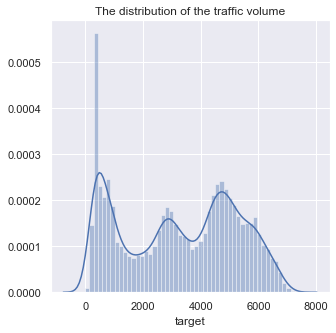

In [7]:
plt.figure(figsize = (5,5))
sns.distplot(data['target'], bins=50)
plt.title('The distribution of the traffic volume')
plt.show()

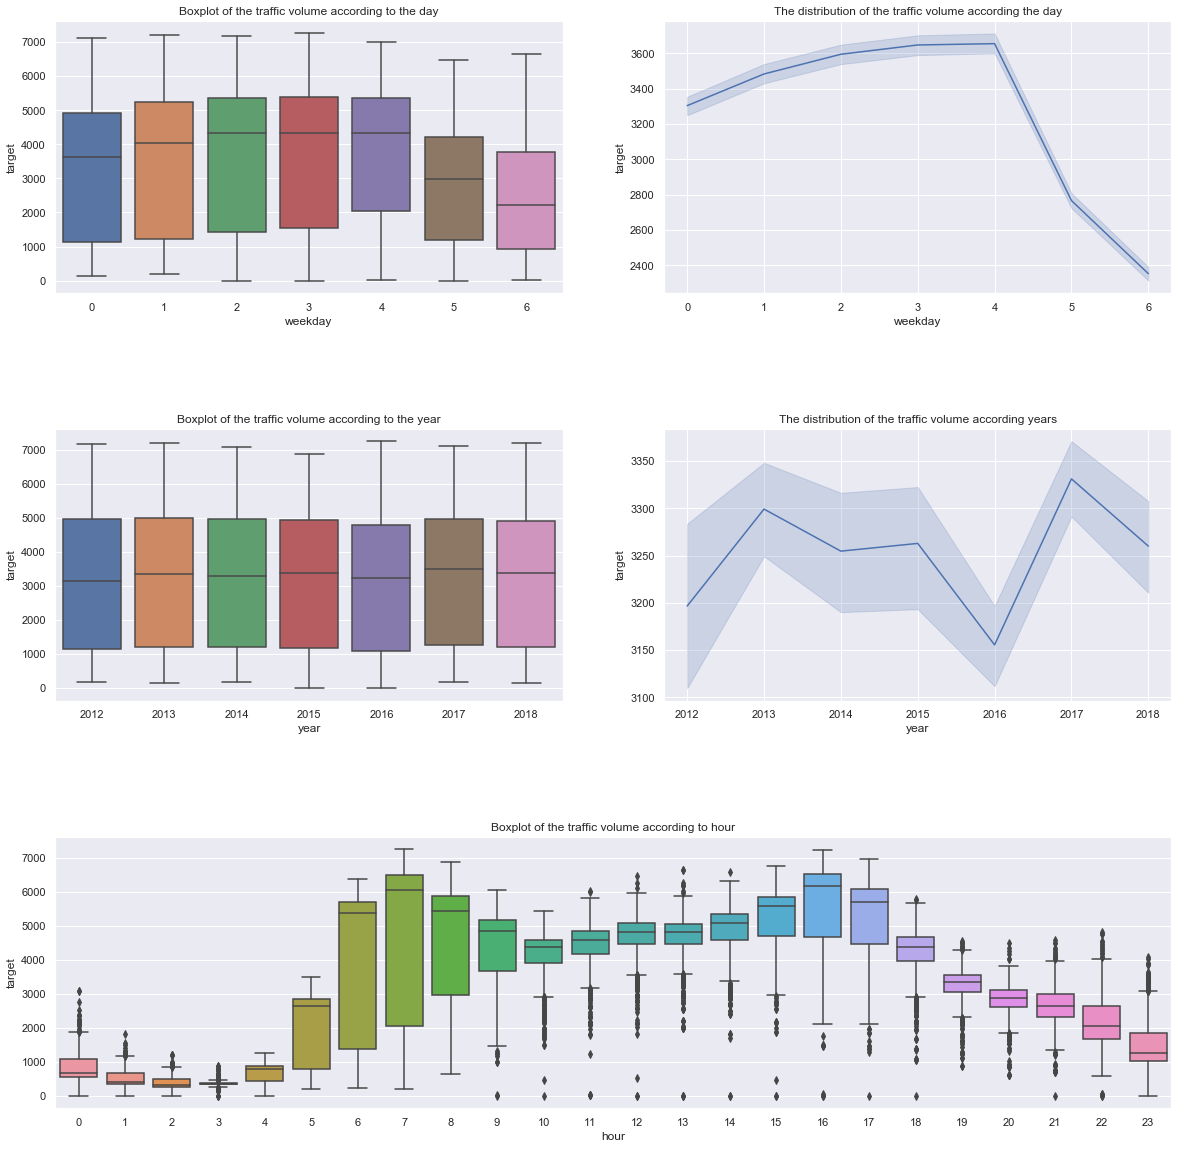

In [8]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5)

plt.subplot(313)
sns.boxplot('hour','target', data= data)
plt.title('Boxplot of the traffic volume according to hour')

plt.subplot(321)
sns.boxplot('weekday','target', data= data)
plt.title('Boxplot of the traffic volume according to the day')
plt.subplot(322)
sns.lineplot('weekday','target', data= data)
plt.title("The distribution of the traffic volume according the day")

plt.subplot(323)
sns.boxplot('year','target', data= data)
plt.title('Boxplot of the traffic volume according to the year')
plt.subplot(324)
sns.lineplot('year','target', data= data)
plt.title("The distribution of the traffic volume according years")
plt.show()

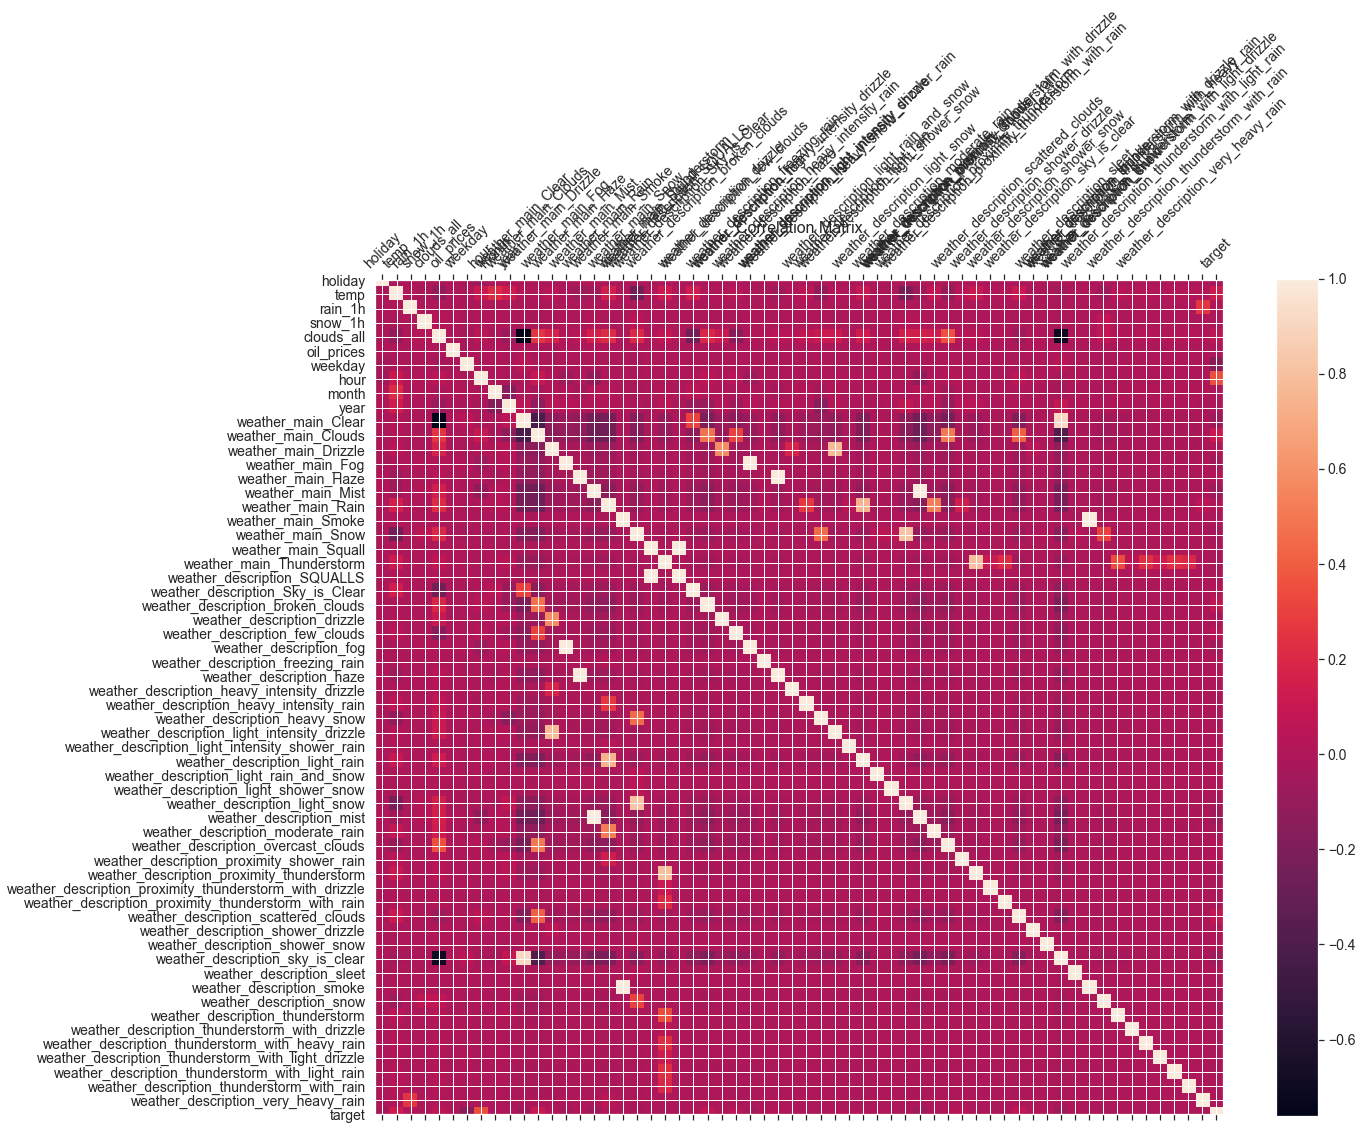

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
print('Most important features according to the correlation with target')
most_important_features = data.corr()['target'].sort_values(ascending=False)[:10]
print (data.corr()['target'].sort_values(ascending=False)[:10], '\n')

Most important features according to the correlation with target
target                                       1.000000
hour                                         0.350545
temp                                         0.131803
weather_main_Clouds                          0.119544
weather_description_scattered_clouds         0.083946
weather_description_broken_clouds            0.065639
clouds_all                                   0.064201
weather_description_few_clouds               0.044360
weather_description_proximity_shower_rain    0.034044
weather_main_Haze                            0.019314
Name: target, dtype: float64 



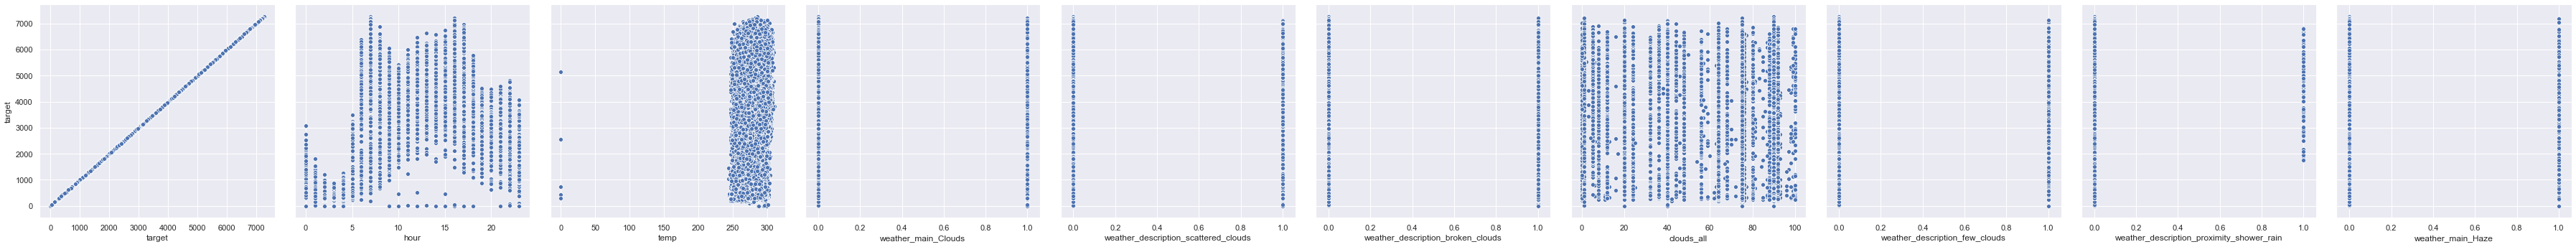

In [11]:
a = list(most_important_features.index)
sns.pairplot(data,height= 5, x_vars = a , y_vars = 'target')
plt.show()

Step 2: Building a predictive model


## Loading data with DataManager

We reload the data with the AutoML DataManager class because this is more convenient:

Keep this, it illustrates how data in AutoML formal are loaded by the ingestion program

In [12]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : D:\Development 2\GitHub Projects\2020 Project\L2Project Folder\velo\starting_kit\input_data\xporters_public.info
DataManager : xporters
info:
	usage = Sample dataset Traffic Volume data
	name = traffic
	task = regression
	target_type = Numerical
	feat_type = Numerical
	metric = r2_metric
	time_budget = 1200
	feat_num = 59
	target_num = 3
	label_num = 3
	train_num = 35
	valid_num = 35
	test_num = 35
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(38563, 59)
	Y_train = array(38563,)
	X_valid = array(4820, 59)
	Y_valid = array(0,)
	X_test = array(4820, 59)
	Y_test = array(0,)
feat_type:	array(59,)
feat_idx:	array(0,)



## Step 2: Preprocessing

## Training a predictive model

We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.

What we decided to do as the model binome, is to use the code from TP2 to compare several models that are chosen by us. In our opinion, the `systematic_model_experiment` provides a good framework for the testing in clear and concise code, only requiring us to make a list of the models we want to experiment on. This is also done in TP2, though they use classifiers there instead of regressors, which we have to use for this assignment.

In [13]:
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X_train = D.data['X_train']
y_train = D.data['Y_train'].reshape(len(D.data['Y_train']), 1)

Create a subsampled dataset to improve model testing time.

In [14]:
_, Xtemp, _, ytemp = train_test_split(X_train, y_train, test_size=0.2)
X_train_modeltest, X_dev_modeltest, y_train_modeltest, y_dev_modeltest = train_test_split(Xtemp,
                                                                                         ytemp,
                                                                                         test_size=0.2)

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train)
#X_train = scaler.transform(X_train)
X_train_modelscale = scaler.transform(X_train_modeltest)
X_dev_modelscale = scaler.transform(X_dev_modeltest)

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

### Defining preprocessing methods and transforming the data

In [18]:
def PCA_prepro(train_data, dev_data=None, n_components=0.999):
    rnd_seed = 42
    pca = PCA(n_components = n_components)
    pca.fit(train_data)
    train_data_transformed = pca.transform(train_data)
    if dev_data is not None:
        dev_data_transformed = pca.transform(dev_data)    
        return train_data_transformed, dev_data_transformed
    else:
        return train_data_transformed

In [63]:
X_train_pca = PCA_prepro(X_train)

In [19]:
X_train_modeltest_pca, X_dev_modeltest_pca = PCA_prepro(X_train_modelscale, X_dev_modelscale)

In [20]:
def TSNE_prepro(train_data, dev_data=None, n_components=2):
    # TSNE does not have a separate fit and transform function due to its nature
    # and because the development set cannot be transformed using the parameters
    # of the train_data, the preformance on the dev_data is probably less
    # meaningful than is desirable.
    tsne = TSNE(n_components=n_components)
    train_data_transformed = tsne.fit_transform(train_data)
    if dev_data is not None:
        dev_data_transformed = tsne.fit_transform(dev_data)
        return train_data_transformed, dev_data_transformed
    else:
        return train_data_transformed

In [64]:
X_train_tsne = TSNE_prepro(X_train)

In [21]:
X_train_modeltest_tsne, X_dev_modeltest_tsne = TSNE_prepro(X_train_modelscale, X_dev_modelscale)

In [22]:
def LDA_prepro(train_data, label, dev_data=None, n_components = 5):
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    lda.fit(train_data, np.ravel(label, order = 'C'))
    train_data_transformed = lda.transform(train_data)
    if dev_data is not None:
        dev_data_transformed = lda.transform(dev_data)
        return train_data_transformed, dev_data_transformed
    else:
        return train_data_transformed

In [91]:
X_train_lda = LDA_prepro(X_train, y_train)

In [23]:
X_train_modeltest_lda, X_dev_modeltest_lda = LDA_prepro(X_train_modelscale, y_train_modeltest, X_dev_modelscale)

In [24]:
def LLE_prepro(train_data, dev_data=None, n_components = 5):
    lle = LocallyLinearEmbedding(n_components=n_components)
    lle.fit(train_data)
    train_data_transformed = lle.transform(train_data)
    if dev_data is not None:
        dev_data_transformed = lle.transform(dev_data)
        return train_data_transformed, dev_data_transformed
    else:
        return train_data_transformed

In [66]:
X_train_lle = LLE_prepro(X_train, y_train)

In [25]:
X_train_modeltest_lle, X_dev_modeltest_lle = LLE_prepro(X_train_modelscale, y_train_modeltest, X_dev_modelscale)

## Step 3: Model testing with different Preprocessing steps

#### The following automated testing of the hyperparameters per model per preprocessing method was new since last time. We are quite proud of how this turned out. The code is readible and most functionality is placed in python functions for easier repetition and the best hyperparameters are automatically saved in a .csv file.

It uses a subset of the training set in order to speed up testing. This decreases the confidence in the results, though it should still be a good indication and it takes one fifth of the time it would take on the complete set, which is a trade-off that was worth it for us.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
# Can use later to substitute hardcode lists of integer, np.randint is also an option
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

testparams_SVR = dict(kernel=['rbf', 'linear', 'poly'], C=uniform(loc=0.5, scale=4.5))

# Linear Regression does not have significantly influential hyperparameters to tune
testparams_LR = dict()

testparams_KNN = dict(n_neighbors=[1, 3, 5, 8, 10], weights=['uniform', 'distance'],
             p=[1, 2])

testparams_GBR = dict(loss=['ls', 'lad'], learning_rate=uniform(loc=0.01, scale=0.99),
             n_estimators=np.random.randint(low=50, high=500, size = 5), criterion=['mse', 'friedman_mse'], 
                      min_samples_split=np.random.randint(low=2, high=10, size = 5), max_depth=np.random.randint(low=2, high=12, size = 5))

testparams_MLP = dict(activation=['relu', 'logistic'], learning_rate=['constant', 'adaptive'],
             solver=['adam', 'lbfgs'])

testparams_RF = dict(max_depth=np.random.randint(low=5, high=50, size = 5), n_estimators=np.random.randint(low=50, high=500, size = 5),
             criterion=['mse', 'mae'], min_samples_split=np.random.randint(low=2, high=12, size = 5))

testparams_Ada = dict(loss=['linear', 'square'])

# Put parameters in dictionary
test_params_all = [testparams_SVR, testparams_LR, testparams_KNN, testparams_GBR, testparams_MLP, testparams_RF, testparams_Ada]

In [27]:
import csv
import os

def save_to_csv(filename, model_name, param_dict):
    with open(filename, 'a+', newline='') as f:
        writer = csv.writer(f)
        dictionary = {'{}'.format(model_name) : param_dict}
        for key, values in dictionary.items():
            row = [key] + [value for item in values.items() for value in item]
            writer.writerow(row)
        
        
def open_from_csv(filename, model_name):
    # transform input to a dict that can be used by sklearn models
    params = {}
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            if row:
                a = iter(row[1:])
                params[row[0]] = dict(zip(row[1::2], row[2::2]))
    return params[model_name]

# TRIED TO MAP THE VALUES OF THE DICTIONARY TO INTEGERS, BUT COULDN'T FIND
# A WAY TO DEAL WITH BOTH INTEGER AND STRING VALUES IN THE DICTIONARY.
#def open_from_csv(filename, model_name):
#    # transform input to a dict that can be used by sklearn models
#    params = {}
#    with open(filename, 'r') as f:
#        reader = csv.reader(f)
#        for row in reader:
#            if row:
#                a = iter(row[1:])
#                params[row[0]] = dict(zip(row[1::2], map(int, row[2::2])))
#    return params[model_name]

In [29]:
def optimize_hyperparameters(model, 
                             parameters,
                             X_train,
                             y_train,
                             X_dev,
                             y_dev,
                             prepro,
                             model_name,
                             scoring = scoring_function, 
                             cv = 3, 
                             random_state = 42):
    '''
    This function optimizes the hyperparameters of a provided model using
    scikit-learn's RandomSearchCV based on provided parameters to test by
    the user. It returns a dictionary of the best parameters of the model.
    '''
    
    scoring_func = make_scorer(scoring)
    reg = RandomizedSearchCV(model, 
                             parameters, 
                             scoring=scoring_func, 
                             cv = cv, 
                             random_state=random_state)
    
    reg = reg.fit(X_train, y_train)
    
    pred_train = reg.predict(X_train)
    pred_dev = reg.predict(X_dev)
    
    score_train = scoring(y_train, pred_train)
    score_dev = scoring(y_dev, pred_dev)
    
    print("The score on the training set: ", score_train)
    print("The score on the development set: ", score_dev)
    
    # Negative score means higher training score than development score
    print("The different betweent the scores: ", score_dev - score_train)
    save_to_csv('params_{}.csv'.format(prepro), model_name, reg.best_params_)
    return reg.best_params_

In [30]:
# TEST

#test_model = RandomForestRegressor(random_state=0)
#
#optimize_hyperparameters(test_model, 
#                         testparams_RF,
#                         X_train_modelscale,
#                         y_train_modeltest,
#                         X_dev_modelscale,
#                         y_dev_modeltest,
#                         prepro='NoPreprocessing',
#                         model_name = 'RF')

In [31]:
def optimize_models_dataset(models_list,
                            models_names,
                            models_params,
                            X_train,
                            y_train,
                            X_dev,
                            y_dev,
                           prepro = 'NoPreprocessing'):
    '''
    This function optimizes the hyperparameters of the input models based
    on the parameter options fed into the function. The function uses
    the optimize_hyperparameters.
    '''
    best_models_params = []
    
    for i in range(len(models_list)):
        model = models_list[i]
        model_name = models_names[i]
        params = models_params[i]
        
        print(model_name, " is being tested now")
        
        best_params = optimize_hyperparameters(model,
                                              params,
                                              X_train,
                                              y_train,
                                              X_dev,
                                              y_dev,
                                              prepro = prepro,
                                              model_name = model_name)
        
        best_models_params.append(best_params)        
    return best_models_params

### Models to be tested

In [32]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

models_name = ["Support Vector Regressor", 
              "Linear Regression", 
              "Nearest Neighbour Regressor", 
              "Gradient Boosting Regressor",
              "Feedforward Neural Network Regressor",
              "Random Forest Regressor",
              "AdaBoost Regressor"]

models_list = [
    SVR(),
    LinearRegression(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(random_state=42),
    MLPRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    AdaBoostRegressor(random_state=42)]

### No preprocessing

In [34]:
noprepro_opt_params = optimize_models_dataset(models_list, models_name, test_params_all, X_train_modeltest, y_train_modeltest.ravel(), X_dev_modeltest, y_dev_modeltest.ravel())

Support Vector Regressor  is being tested now
The score on the training set:  0.13671162705369766
The score on the development set:  0.0984861582787655
The different betweent the scores:  -0.03822546877493216
Linear Regression  is being tested now
The score on the training set:  0.18136148308185784
The score on the development set:  0.14133896779551502
The different betweent the scores:  -0.04002251528634282
Nearest Neighbour Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  1.0
The score on the development set:  0.649308248327356
The different betweent the scores:  -0.350691751672644
Gradient Boosting Regressor  is being tested now
The score on the training set:  0.9477185587528114
The score on the development set:  0.946253682663816
The different betweent the scores:  -0.0014648760889953705
Feedforward Neural Network Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

The score on the training set:  0.21554083228163667
The score on the development set:  0.18563247051414067
The different betweent the scores:  -0.029908361767496006
Random Forest Regressor  is being tested now
The score on the training set:  0.9837634399707218
The score on the development set:  0.9465348002251063
The different betweent the scores:  -0.03722863974561552
AdaBoost Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  0.8134127914811997
The score on the development set:  0.8161452189920597
The different betweent the scores:  0.0027324275108600027


### Scaling optimal parameters

In [35]:
scaling_opt_params = optimize_models_dataset(models_list, models_name, test_params_all, X_train_modelscale, y_train_modeltest.ravel(), X_dev_modelscale, y_dev_modeltest.ravel(), prepro = 'Scaling')

Support Vector Regressor  is being tested now
The score on the training set:  0.12283948338186645
The score on the development set:  0.10219983316434256
The different betweent the scores:  -0.020639650217523897
Linear Regression  is being tested now
The score on the training set:  0.18135580715059008
The score on the development set:  -3.931974949688973e+19
The different betweent the scores:  -3.931974949688973e+19
Nearest Neighbour Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  1.0
The score on the development set:  0.6014173763980484
The different betweent the scores:  -0.3985826236019516
Gradient Boosting Regressor  is being tested now
The score on the training set:  0.9477185587528114
The score on the development set:  0.9462025057032858
The different betweent the scores:  -0.001516053049525623
Feedforward Neural Network Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The score on the training set:  0.7395936529440719
The score on the development set:  0.7037452129409727
The different betweent the scores:  -0.03584844000309917
Random Forest Regressor  is being tested now
The score on the training set:  0.9837705805976281
The score on the development set:  0.9465289730022213
The different betweent the scores:  -0.037241607595406845
AdaBoost Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  0.8088498139653295
The score on the development set:  0.8129749864960739
The different betweent the scores:  0.004125172530744403


### PCA optimal parameters

In [36]:
pca_opt_params = optimize_models_dataset(models_list, models_name, test_params_all, X_train_modeltest_pca, y_train_modeltest.ravel(), X_dev_modeltest_pca, y_dev_modeltest.ravel(), prepro = 'PCA')

Support Vector Regressor  is being tested now
The score on the training set:  0.12283806732414604
The score on the development set:  0.10219888853126047
The different betweent the scores:  -0.02063917879288557
Linear Regression  is being tested now
The score on the training set:  0.18044262183514215
The score on the development set:  0.14270984972861223
The different betweent the scores:  -0.03773277210652992
Nearest Neighbour Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  1.0
The score on the development set:  0.6194913952798364
The different betweent the scores:  -0.38050860472016357
Gradient Boosting Regressor  is being tested now
The score on the training set:  0.9999811243549688
The score on the development set:  0.8363117989860779
The different betweent the scores:  -0.1636693253688909
Feedforward Neural Network Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The score on the training set:  0.8662452616177558
The score on the development set:  0.8363763529342682
The different betweent the scores:  -0.029868908683487683
Random Forest Regressor  is being tested now
The score on the training set:  0.9779115463879611
The score on the development set:  0.8468033604466605
The different betweent the scores:  -0.13110818594130058
AdaBoost Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  0.5951575286260825
The score on the development set:  0.5577890963653592
The different betweent the scores:  -0.03736843226072328


### TSNE optimal parameters

In [37]:
tsne_opt_params = optimize_models_dataset(models_list, models_name, test_params_all, X_train_modeltest_tsne, y_train_modeltest.ravel(), X_dev_modeltest_tsne, y_dev_modeltest.ravel(), prepro = 'TSNE')

Support Vector Regressor  is being tested now
The score on the training set:  0.009875657468523813
The score on the development set:  0.005007876176909343
The different betweent the scores:  -0.00486778129161447
Linear Regression  is being tested now
The score on the training set:  0.0001460230269494378
The score on the development set:  0.0011365341694282716
The different betweent the scores:  0.0009905111424788338
Nearest Neighbour Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  1.0
The score on the development set:  -0.730702787941425
The different betweent the scores:  -1.730702787941425
Gradient Boosting Regressor  is being tested now
The score on the training set:  0.9773028570773458
The score on the development set:  -0.5404673573506789
The different betweent the scores:  -1.5177702144280247
Feedforward Neural Network Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The score on the training set:  0.08106956797537579
The score on the development set:  -0.08875437455969704
The different betweent the scores:  -0.16982394253507282
Random Forest Regressor  is being tested now
The score on the training set:  0.9318772517634032
The score on the development set:  -0.49857983271146633
The different betweent the scores:  -1.4304570844748694
AdaBoost Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  0.06647758756976241
The score on the development set:  -0.02721529939278411
The different betweent the scores:  -0.09369288696254652


### LDA optimal parameters

In [38]:
lda_opt_params = optimize_models_dataset(models_list, models_name, test_params_all, X_train_modeltest_lda, y_train_modeltest.ravel(), X_dev_modeltest_lda, y_dev_modeltest.ravel(), prepro = 'LDA')

Support Vector Regressor  is being tested now
The score on the training set:  0.4971615563365773
The score on the development set:  0.4888699466264502
The different betweent the scores:  -0.008291609710127101
Linear Regression  is being tested now
The score on the training set:  0.12533641411071117
The score on the development set:  0.09739949684666782
The different betweent the scores:  -0.02793691726404335
Nearest Neighbour Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  1.0
The score on the development set:  0.8230317924187496
The different betweent the scores:  -0.17696820758125043
Gradient Boosting Regressor  is being tested now
The score on the training set:  0.9997884900312548
The score on the development set:  0.8109160556547602
The different betweent the scores:  -0.1888724343764946
Feedforward Neural Network Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The score on the training set:  0.8012512250711892
The score on the development set:  0.7730361267321534
The different betweent the scores:  -0.028215098339035793
Random Forest Regressor  is being tested now
The score on the training set:  0.9768712433703729
The score on the development set:  0.8226946691003916
The different betweent the scores:  -0.15417657426998133
AdaBoost Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  0.7231300241471734
The score on the development set:  0.6963589881189681
The different betweent the scores:  -0.026771036028205297


### LLE optimal parameters

In [39]:
lle_opt_params = optimize_models_dataset(models_list, models_name, test_params_all, X_train_modeltest_lle, y_train_modeltest.ravel(), X_dev_modeltest_lle, y_dev_modeltest.ravel(), prepro = 'LLE')

Support Vector Regressor  is being tested now
The score on the training set:  0.0006464201227731614
The score on the development set:  -0.0022512671578258647
The different betweent the scores:  -0.002897687280599026
Linear Regression  is being tested now
The score on the training set:  0.006302874209507148
The score on the development set:  -0.001983528794802014
The different betweent the scores:  -0.008286403004309162
Nearest Neighbour Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  0.11961334486298492
The score on the development set:  -0.07400310259657483
The different betweent the scores:  -0.19361644745955975
Gradient Boosting Regressor  is being tested now
The score on the training set:  0.023302350844280006
The score on the development set:  -0.00695537903922383
The different betweent the scores:  -0.030257729883503837
Feedforward Neural Network Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum ite

The score on the training set:  0.01329077829049663
The score on the development set:  0.0026566045753727563
The different betweent the scores:  -0.010634173715123874
Random Forest Regressor  is being tested now
The score on the training set:  0.04018961207853511
The score on the development set:  0.013403966987701854
The different betweent the scores:  -0.026785645090833254
AdaBoost Regressor  is being tested now


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


The score on the training set:  0.018064961351799025
The score on the development set:  0.01235672876902405
The different betweent the scores:  -0.005708232582774975


In [40]:
noprepro_opt_params

[{'C': 3.7489944752007114, 'kernel': 'linear'},
 {},
 {'weights': 'distance', 'p': 1, 'n_neighbors': 10},
 {'criterion': 'friedman_mse',
  'learning_rate': 0.5190920940294755,
  'loss': 'lad',
  'max_depth': 5,
  'min_samples_split': 3,
  'n_estimators': 88},
 {'solver': 'adam', 'learning_rate': 'constant', 'activation': 'relu'},
 {'n_estimators': 145,
  'min_samples_split': 5,
  'max_depth': 32,
  'criterion': 'mse'},
 {'loss': 'linear'}]

In [41]:
scaling_opt_params

[{'C': 3.7489944752007114, 'kernel': 'linear'},
 {},
 {'weights': 'distance', 'p': 1, 'n_neighbors': 10},
 {'criterion': 'friedman_mse',
  'learning_rate': 0.5190920940294755,
  'loss': 'lad',
  'max_depth': 5,
  'min_samples_split': 3,
  'n_estimators': 88},
 {'solver': 'lbfgs', 'learning_rate': 'constant', 'activation': 'logistic'},
 {'n_estimators': 145,
  'min_samples_split': 5,
  'max_depth': 32,
  'criterion': 'mse'},
 {'loss': 'linear'}]

In [42]:
pca_opt_params

[{'C': 3.7489944752007114, 'kernel': 'linear'},
 {},
 {'weights': 'distance', 'p': 2, 'n_neighbors': 5},
 {'criterion': 'friedman_mse',
  'learning_rate': 0.15143814974272138,
  'loss': 'ls',
  'max_depth': 10,
  'min_samples_split': 6,
  'n_estimators': 369},
 {'solver': 'lbfgs', 'learning_rate': 'constant', 'activation': 'logistic'},
 {'n_estimators': 452,
  'min_samples_split': 2,
  'max_depth': 46,
  'criterion': 'mse'},
 {'loss': 'linear'}]

In [43]:
tsne_opt_params

[{'C': 2.566620013846402, 'kernel': 'rbf'},
 {},
 {'weights': 'distance', 'p': 2, 'n_neighbors': 5},
 {'criterion': 'friedman_mse',
  'learning_rate': 0.15143814974272138,
  'loss': 'ls',
  'max_depth': 10,
  'min_samples_split': 6,
  'n_estimators': 369},
 {'solver': 'lbfgs', 'learning_rate': 'constant', 'activation': 'relu'},
 {'n_estimators': 452,
  'min_samples_split': 2,
  'max_depth': 27,
  'criterion': 'mae'},
 {'loss': 'linear'}]

In [44]:
lda_opt_params

[{'C': 2.566620013846402, 'kernel': 'rbf'},
 {},
 {'weights': 'distance', 'p': 1, 'n_neighbors': 10},
 {'criterion': 'friedman_mse',
  'learning_rate': 0.15143814974272138,
  'loss': 'ls',
  'max_depth': 10,
  'min_samples_split': 6,
  'n_estimators': 369},
 {'solver': 'lbfgs', 'learning_rate': 'constant', 'activation': 'relu'},
 {'n_estimators': 452,
  'min_samples_split': 2,
  'max_depth': 46,
  'criterion': 'mse'},
 {'loss': 'linear'}]

In [45]:
lle_opt_params

[{'C': 2.566620013846402, 'kernel': 'rbf'},
 {},
 {'weights': 'uniform', 'p': 2, 'n_neighbors': 10},
 {'criterion': 'friedman_mse',
  'learning_rate': 0.2202157195714934,
  'loss': 'lad',
  'max_depth': 4,
  'min_samples_split': 4,
  'n_estimators': 254},
 {'solver': 'lbfgs', 'learning_rate': 'constant', 'activation': 'logistic'},
 {'n_estimators': 145,
  'min_samples_split': 5,
  'max_depth': 5,
  'criterion': 'mse'},
 {'loss': 'linear'}]

## Step 4: Testing which model performs best

In this section, the parameters that turned out to be best according to the previous hyperparameter testing are used to train models on the differently prepared data to find out which model works best.

#### We are very proud of the classes for model() and for ModelTesting() that is used in the model class. This made the testing of the models on the datasets much more hands-off and much easier and we think the code works well and is readible and reusable.

In [16]:
from data_io import write
from model import model
# Uncomment the next line to show the code of the model
# ??model 

In [95]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

models_name = ["Support Vector Regressor", 
              "Linear Regression", 
              "Nearest Neighbour Regressor", 
              "Gradient Boosting Regressor",
              "Feedforward Neural Network Regressor",
              "Random Forest Regressor",
              "AdaBoost Regressor"]

models_list_noscale = [
    SVR(C = 3.7489944752007114, kernel = 'linear'),
    LinearRegression(),
    KNeighborsRegressor(weights = 'distance', p = 1, n_neighbors = 10),
    GradientBoostingRegressor(random_state=42, criterion = 'friedman_mse',
                             learning_rate = 0.5190920940294755,
                             loss = 'lad', max_depth = 5,
                             min_samples_split = 3, n_estimators = 88),
    MLPRegressor(random_state=42, solver = 'adam', learning_rate = 'constant',
                activation = 'relu'),
    RandomForestRegressor(random_state=42, n_estimators = 145,
                         min_samples_split = 5, max_depth = 32,
                         criterion = 'mse'),
    AdaBoostRegressor(random_state=42, loss = 'linear')]

models_list_scale = [
    SVR(C = 3.7489944752007114, kernel = 'linear'),
    LinearRegression(),
    KNeighborsRegressor(weights = 'distance', p = 1, n_neighbors = 10),
    GradientBoostingRegressor(random_state=42, criterion = 'friedman_mse',
                             learning_rate = 0.5190920940294755, loss = 'lad',
                             max_depth = 5, min_samples_split = 3,
                             n_estimators = 88),
    MLPRegressor(random_state=42, solver = 'lbfgs', learning_rate = 'constant',
                activation = 'logistic'),
    RandomForestRegressor(random_state=42, n_estimators = 145, max_depth = 32,
                         criterion = 'mse'),
    AdaBoostRegressor(random_state=42, loss = 'linear')]

models_list_pca = [
    SVR(C = 3.7489944752007114, kernel = 'linear'),
    LinearRegression(),
    KNeighborsRegressor(weights = 'distance', p = 2, n_neighbors = 5),
    GradientBoostingRegressor(random_state=42, criterion = 'friedman_mse',
                             learning_rate = 0.15143814974272138,
                             loss = 'ls', max_depth = 10,
                             min_samples_split = 6, n_estimators = 369),
    MLPRegressor(random_state=42, solver = 'lbfgs', learning_rate = 'constant',
                activation = 'logistic'),
    RandomForestRegressor(random_state=42, n_estimators = 452,
                         min_samples_split = 2, max_depth = 46, criterion = 'mse'),
    AdaBoostRegressor(random_state=42, loss = 'linear')]

models_list_tsne = [
    SVR(C = 2.566620013846402, kernel = 'rbf'),
    LinearRegression(),
    KNeighborsRegressor(weights = 'distance', p = 2, n_neighbors = 5),
    GradientBoostingRegressor(random_state=42, criterion = 'friedman_mse',
                             learning_rate = 0.15143814974272138, loss = 'ls',
                             max_depth = 10, min_samples_split = 6,
                             n_estimators = 369),
    MLPRegressor(random_state=42, solver = 'lbfgs', learning_rate = 'constant',
                activation = 'relu'),
    RandomForestRegressor(random_state=42, n_estimators = 452,
                         min_samples_split = 2, max_depth = 27, criterion = 'mae'),
    AdaBoostRegressor(random_state=42, loss = 'linear')]

models_list_lda = [
    SVR(C = 2.566620013846402, kernel = 'rbf'),
    LinearRegression(),
    KNeighborsRegressor(weights = 'distance', p = 1, n_neighbors = 10),
    GradientBoostingRegressor(random_state=42, criterion = 'friedman_mse',
                             learning_rate = 0.15143814974272138, loss = 'ls',
                             max_depth = 10, min_samples_split = 6,
                             n_estimators = 369),
    MLPRegressor(random_state=42, solver = 'lbfgs', learning_rate = 'constant',
                activation = 'relu'),
    RandomForestRegressor(random_state=42, n_estimators = 452,
                         min_samples_split = 2, max_depth = 46, criterion = 'mse'),
    AdaBoostRegressor(random_state=42, loss = 'linear')]

models_list_lle = [
    SVR(C = 2.566620013846402, kernel = 'rbf'),
    LinearRegression(),
    KNeighborsRegressor(weights = 'uniform', p = 2, n_neighbors = 10),
    GradientBoostingRegressor(random_state=42, criterion = 'friedman_mse',
                             learning_rate = 0.2202157195714934, loss = 'lad',
                             max_depth = 4, min_samples_split = 4,
                             n_estimators = 254),
    MLPRegressor(random_state=42, solver = 'lbfgs', learning_rate = 'constant',
                activation = 'logistic'),
    RandomForestRegressor(random_state=42, n_estimators = 145,
                         min_samples_split = 5, max_depth = 5, criterion = 'mse'),
    AdaBoostRegressor(random_state=42, loss = 'linear')]

In [68]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")

scoring_function

<function my_metric.r2_metric(solution, prediction)>

An instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:

### No scaling

In [69]:
from model import model

In [70]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
# M = M.load(trained_model_name)                  

In [71]:
y_train = y_train.ravel()

Train the model (unless you reloaded a trained model) and make predictions. 

In [72]:
M.fit(D.data['X_train'], D.data['Y_train'], models_list_noscale, models_name, 'NoScale')

Testing Support Vector Regressor
Testing Linear Regression
Testing Nearest Neighbour Regressor
Testing Gradient Boosting Regressor
Testing Feedforward Neural Network Regressor


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reache

Testing Random Forest Regressor
Testing AdaBoost Regressor
Using Random Forest Regressor


In [73]:
Y_hat_train = M.predict(X_train)

In [74]:
pd.DataFrame(Y_hat_train).to_csv('Y_hat_train_noscale_{}.csv'.format(the_date))

In [75]:
Y_hat_train = M.predict(D.data['X_train'])
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, y_train))

Training score for the r2_metric metric = 0.9880
Ideal score for the r2_metric metric = 1.0000


### Only scaling

In [76]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
# M = M.load(trained_model_name)                  

In [77]:
y_train = y_train.ravel()

Train the model (unless you reloaded a trained model) and make predictions. 

In [78]:
M.fit(X_train, y_train, models_list_scale, models_name, 'Scaling')

Testing Support Vector Regressor
Testing Linear Regression
Testing Nearest Neighbour Regressor
Testing Gradient Boosting Regressor
Testing Feedforward Neural Network Regressor


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs fa

Testing Random Forest Regressor
Testing AdaBoost Regressor
Using Random Forest Regressor


In [79]:
Y_hat_train = M.predict(X_train)

In [80]:
pd.DataFrame(Y_hat_train).to_csv('Y_hat_train_scaling_{}.csv'.format(the_date))

### PCA

In [81]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
# M = M.load(trained_model_name)                  

Train the model (unless you reloaded a trained model) and make predictions. 

In [82]:
M.fit(X_train_pca, y_train, models_list_pca, models_name, 'PCA')

Testing Support Vector Regressor
Testing Linear Regression
Testing Nearest Neighbour Regressor
Testing Gradient Boosting Regressor
Testing Feedforward Neural Network Regressor


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs fa

Testing Random Forest Regressor
Testing AdaBoost Regressor
Using Gradient Boosting Regressor


In [83]:
Y_hat_train = M.predict(X_train_pca)

In [84]:
pd.DataFrame(Y_hat_train).to_csv('Y_hat_train_pca_{}.csv'.format(the_date))

### TSNE

In [85]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
# M = M.load(trained_model_name)                  

Train the model (unless you reloaded a trained model) and make predictions. 

In [86]:
M.fit(X_train_tsne, y_train, models_list_tsne, models_name, 'TSNE')

Testing Support Vector Regressor
Testing Linear Regression
Testing Nearest Neighbour Regressor
Testing Gradient Boosting Regressor
Testing Feedforward Neural Network Regressor


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs fa

Testing Random Forest Regressor
Testing AdaBoost Regressor
Using Nearest Neighbour Regressor


In [87]:
Y_hat_train = M.predict(X_train_tsne)

In [88]:
pd.DataFrame(Y_hat_train).to_csv('Y_hat_train_tsne.csv_{}'.format(the_date))

### LDA

In [89]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
# M = M.load(trained_model_name)                  

Train the model (unless you reloaded a trained model) and make predictions. 

In [96]:
M.fit(X_train_lda, y_train, models_list_lda, models_name, 'LDA')

Testing Support Vector Regressor
Testing Linear Regression
Testing Nearest Neighbour Regressor
Testing Gradient Boosting Regressor
Testing Feedforward Neural Network Regressor


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs fa

Testing Random Forest Regressor
Testing AdaBoost Regressor
Using Gradient Boosting Regressor


In [97]:
Y_hat_train = M.predict(X_train_lda)

In [98]:
pd.DataFrame(Y_hat_train).to_csv('Y_hat_train_lda_{}.csv'.format(the_date))

### LLE

In [99]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
# M = M.load(trained_model_name)                  

Train the model (unless you reloaded a trained model) and make predictions. 

In [100]:
M.fit(X_train_lle, y_train, models_list_lle, models_name, 'LLE')

Testing Support Vector Regressor
Testing Linear Regression
Testing Nearest Neighbour Regressor
Testing Gradient Boosting Regressor
Testing Feedforward Neural Network Regressor


C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Development\Anaconda3.7\envs\L2Project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs fa

Testing Random Forest Regressor
Testing AdaBoost Regressor
Using Random Forest Regressor


In [101]:
Y_hat_train = M.predict(X_train_lle)

In [102]:
pd.DataFrame(Y_hat_train).to_csv('Y_hat_train_lle_{}.csv'.format(the_date))

- no scaling = RandomForest
- scaling = RandomForest
- pca = Gradient Boosting Regressor
- tsne = Nearest Neighbour Regressor
- lda = Gradient Boosting Regressor
- lle = Random Forest Regressor

## Step 5: Running the final models and exporting the results

Save the trained model (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform. 

The models per dataset are given above and are based on the testing done. The models turned out to have the best performance on that dataset. Below, they are ran again and the results are exported and are uploaded to CodaLab.

The code below is very repetitive and therefore could probably be put in a function or a class to decrease clutter in this file, though we did not have the time for this after making the testing more hands-off.

### No scaling

In [104]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators = 145,
                         min_samples_split = 5, max_depth = 32,
                         criterion = 'mse')
model.fit(D.data['X_train'], D.data['Y_train'])

Y_hat_train = model.predict(D.data['X_train'])
Y_hat_valid = model.predict(D.data['X_valid'])
Y_hat_test = model.predict(D.data['X_test'])

In [105]:
#RF_model.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Scoring the results
### Load the challenge metric

The metric chosen for your challenge is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.

In [106]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
# ??scoring_function

Using scoring metric: r2_metric


### Training performance

The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [107]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, y_train))

Training score for the r2_metric metric = 0.9880
Ideal score for the r2_metric metric = 1.0000


You can add here other scores and result visualization.

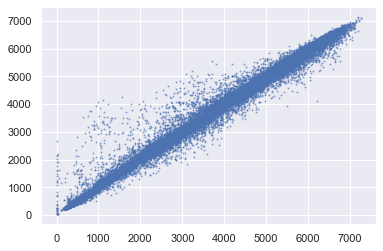

In [108]:
plt.scatter(y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

38563 38563


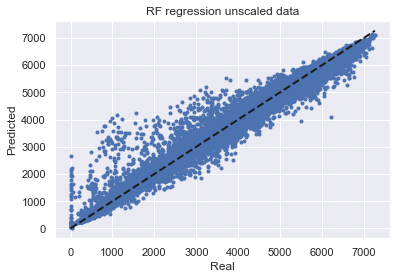

In [109]:
fig, ax = plt.subplots()
print(len(y_train),len(Y_hat_train))
ax.scatter(np.array(y_train), np.array(Y_hat_train), marker='.')
ax.plot([np.array(y_train).min(), np.array(y_train).max()], [np.array(y_train).min(), np.array(y_train).max()], 'k--', lw=2)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.title("RF regression unscaled data")
plt.show()

### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.

In [112]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.95 (+/- 0.00)


### Making a submission

## Unit testing

It is important that you test your submission files before submitting them. All you have to do to make a submission is modify the file model.py in the sample_code_submission/ directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

Keep the sample code simple.


In [113]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


Also test the scoring program:

In [114]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


# Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).

Do NOT zip the data with your submissions.

In [115]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + 'unscaled.zip'
sample_result_submission = '../sample_result_submission_' + the_date + 'unscaled.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_20-04-17-12-17unscaled.zip
../sample_result_submission_20-04-17-12-17unscaled.zip


### Scaling

In [117]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators = 145, max_depth = 32, criterion = 'mse')

scaler = MinMaxScaler()
scaler.fit(D.data['X_train'])
#X_train = scaler.transform(X_train)
X_train = scaler.transform(D.data['X_train'])
X_valid = scaler.transform(D.data['X_valid'])
X_test = scaler.transform(D.data['X_test'])

model.fit(X_train, D.data['Y_train'])

Y_hat_train = model.predict(X_train)
Y_hat_valid = model.predict(X_valid)
Y_hat_test = model.predict(X_test)

In [118]:
#RF_model.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Scoring the results
### Load the challenge metric

The metric chosen for your challenge is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.

In [119]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
# ??scoring_function

Using scoring metric: r2_metric


### Training performance

The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [120]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, y_train))

Training score for the r2_metric metric = 0.9933
Ideal score for the r2_metric metric = 1.0000


You can add here other scores and result visualization.

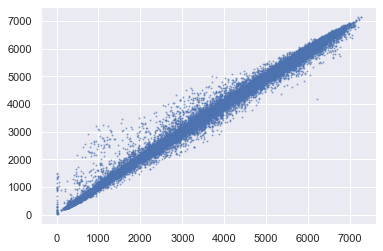

In [121]:
plt.scatter(y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

38563 38563


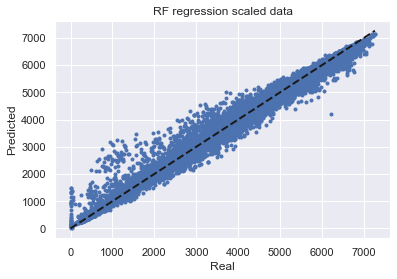

In [122]:
fig, ax = plt.subplots()
print(len(y_train),len(Y_hat_train))
ax.scatter(np.array(y_train), np.array(Y_hat_train), marker='.')
ax.plot([np.array(y_train).min(), np.array(y_train).max()], [np.array(y_train).min(), np.array(y_train).max()], 'k--', lw=2)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.title("RF regression scaled data")
plt.show()

### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.

In [124]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.95 (+/- 0.00)


# Making a submission

## Unit testing

It is important that you test your submission files before submitting them. All you have to do to make a submission is modify the file model.py in the sample_code_submission/ directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

Keep the sample code simple.


In [125]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


Also test the scoring program:

In [126]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


# Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).

Do NOT zip the data with your submissions.

In [127]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + 'scaled.zip'
sample_result_submission = '../sample_result_submission_' + the_date + 'scaled.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_20-04-17-12-23scaled.zip
../sample_result_submission_20-04-17-12-23scaled.zip


### PCA

In [128]:
from sklearn.ensemble import RandomForestRegressor
GradientBoostingRegressor(random_state=42, criterion = 'friedman_mse',
                             learning_rate = 0.15143814974272138,
                             loss = 'ls', max_depth = 10,
                             min_samples_split = 6, n_estimators = 369)

pca = PCA(n_components = 0.999)
pca.fit(D.data['X_train'])
#X_train = scaler.transform(X_train)
X_train = pca.transform(D.data['X_train'])
X_valid = pca.transform(D.data['X_valid'])
X_test = pca.transform(D.data['X_test'])

model.fit(X_train, D.data['Y_train'])

Y_hat_train = model.predict(X_train)
Y_hat_valid = model.predict(X_valid)
Y_hat_test = model.predict(X_test)

In [129]:
#RF_model.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Scoring the results
### Load the challenge metric

The metric chosen for your challenge is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.

In [130]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
# ??scoring_function

Using scoring metric: r2_metric


### Training performance

The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [131]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, y_train))

Training score for the r2_metric metric = 0.9934
Ideal score for the r2_metric metric = 1.0000


You can add here other scores and result visualization.

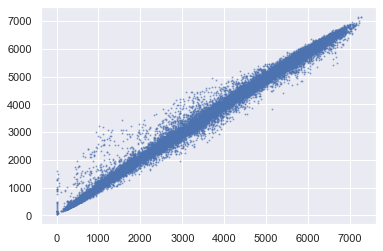

In [132]:
plt.scatter(y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

38563 38563


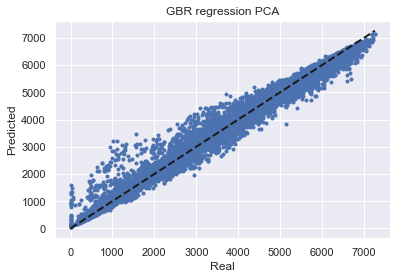

In [133]:
fig, ax = plt.subplots()
print(len(y_train),len(Y_hat_train))
ax.scatter(np.array(y_train), np.array(Y_hat_train), marker='.')
ax.plot([np.array(y_train).min(), np.array(y_train).max()], [np.array(y_train).min(), np.array(y_train).max()], 'k--', lw=2)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.title("GBR regression PCA")
plt.show()

### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.

In [134]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.95 (+/- 0.00)


# Making a submission

## Unit testing

It is important that you test your submission files before submitting them. All you have to do to make a submission is modify the file model.py in the sample_code_submission/ directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

Keep the sample code simple.


In [135]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


Also test the scoring program:

In [136]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


# Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).

Do NOT zip the data with your submissions.

In [137]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + 'PCA.zip'
sample_result_submission = '../sample_result_submission_' + the_date + 'PCA.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_20-04-17-12-27PCA.zip
../sample_result_submission_20-04-17-12-27PCA.zip


### TSNE

In [138]:
from sklearn.ensemble import RandomForestRegressor
model = KNeighborsRegressor(weights = 'distance', p = 2, n_neighbors = 5)

tsne = TSNE(n_components = 2)
X_train = tsne.fit_transform(D.data['X_train'])
X_valid = tsne.fit_transform(D.data['X_valid'])
X_test = tsne.fit_transform(D.data['X_test'])

model.fit(X_train, D.data['Y_train'])

Y_hat_train = model.predict(X_train)
Y_hat_valid = model.predict(X_valid)
Y_hat_test = model.predict(X_test)

In [139]:
#RF_model.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Scoring the results
### Load the challenge metric

The metric chosen for your challenge is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.

In [140]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
# ??scoring_function

Using scoring metric: r2_metric


### Training performance

The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [141]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, y_train))

Training score for the r2_metric metric = 1.0000
Ideal score for the r2_metric metric = 1.0000


You can add here other scores and result visualization.

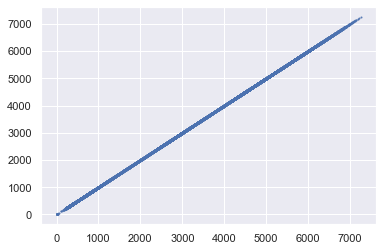

In [142]:
plt.scatter(y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

38563 38563


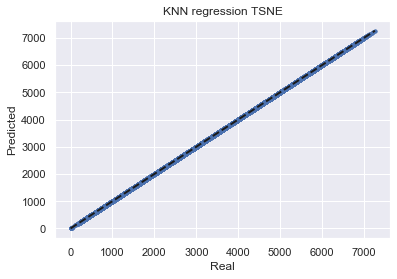

In [143]:
fig, ax = plt.subplots()
print(len(y_train),len(Y_hat_train))
ax.scatter(np.array(y_train), np.array(Y_hat_train), marker='.')
ax.plot([np.array(y_train).min(), np.array(y_train).max()], [np.array(y_train).min(), np.array(y_train).max()], 'k--', lw=2)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.title("KNN regression TSNE")
plt.show()

### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.

In [144]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.63 (+/- 0.03)


# Making a submission

## Unit testing

It is important that you test your submission files before submitting them. All you have to do to make a submission is modify the file model.py in the sample_code_submission/ directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

Keep the sample code simple.


In [145]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


Also test the scoring program:

In [146]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


# Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).

Do NOT zip the data with your submissions.

In [147]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + 'TSNE.zip'
sample_result_submission = '../sample_result_submission_' + the_date + 'TSNE.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_20-04-17-12-33TSNE.zip
../sample_result_submission_20-04-17-12-33TSNE.zip


### LDA

In [148]:
from sklearn.ensemble import RandomForestRegressor
model = GradientBoostingRegressor(random_state=42, criterion = 'friedman_mse',
                             learning_rate = 0.15143814974272138, loss = 'ls',
                             max_depth = 10, min_samples_split = 6,
                             n_estimators = 369)

lda = LinearDiscriminantAnalysis(n_components=5)
lda.fit(D.data['X_train'], D.data['Y_train'])

X_train = lda.transform(D.data['X_train'])
X_valid = lda.transform(D.data['X_valid'])
X_test = lda.transform(D.data['X_test'])

model.fit(X_train, D.data['Y_train'])

Y_hat_train = model.predict(X_train)
Y_hat_valid = model.predict(X_valid)
Y_hat_test = model.predict(X_test)

In [149]:
#RF_model.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Scoring the results
### Load the challenge metric

The metric chosen for your challenge is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.

In [150]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
# ??scoring_function

Using scoring metric: r2_metric


### Training performance

The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [151]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, y_train))

Training score for the r2_metric metric = 0.9914
Ideal score for the r2_metric metric = 1.0000


You can add here other scores and result visualization.

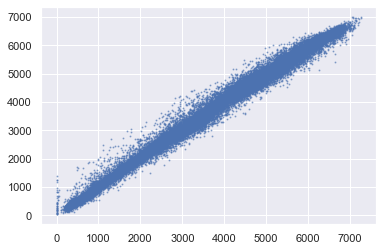

In [152]:
plt.scatter(y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

38563 38563


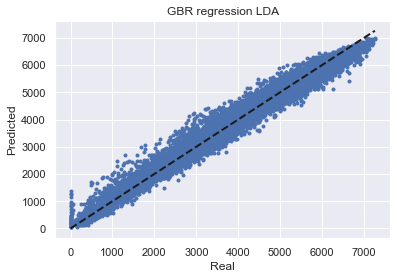

In [153]:
fig, ax = plt.subplots()
print(len(y_train),len(Y_hat_train))
ax.scatter(np.array(y_train), np.array(Y_hat_train), marker='.')
ax.plot([np.array(y_train).min(), np.array(y_train).max()], [np.array(y_train).min(), np.array(y_train).max()], 'k--', lw=2)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.title("GBR regression LDA")
plt.show()

### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.

In [154]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.91 (+/- 0.00)


# Making a submission

## Unit testing

It is important that you test your submission files before submitting them. All you have to do to make a submission is modify the file model.py in the sample_code_submission/ directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

Keep the sample code simple.


In [155]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


Also test the scoring program:

In [156]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


# Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).

Do NOT zip the data with your submissions.

In [157]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + 'LDA.zip'
sample_result_submission = '../sample_result_submission_' + the_date + 'LDA.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_20-04-17-12-40LDA.zip
../sample_result_submission_20-04-17-12-40LDA.zip


### LLE

In [158]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42, n_estimators = 145,
                         min_samples_split = 5, max_depth = 5, criterion = 'mse')

lle = LocallyLinearEmbedding(n_components=5)
lle.fit(D.data['X_train'])

X_train = lle.transform(D.data['X_train'])
X_valid = lle.transform(D.data['X_valid'])
X_test = lle.transform(D.data['X_test'])

model.fit(X_train, D.data['Y_train'])

Y_hat_train = model.predict(X_train)
Y_hat_valid = model.predict(X_valid)
Y_hat_test = model.predict(X_test)

In [159]:
#RF_model.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Scoring the results
### Load the challenge metric

The metric chosen for your challenge is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.

In [160]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
# ??scoring_function

Using scoring metric: r2_metric


### Training performance

The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.

In [162]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(y_train, y_train))

Training score for the r2_metric metric = 0.0296
Ideal score for the r2_metric metric = 1.0000


You can add here other scores and result visualization.

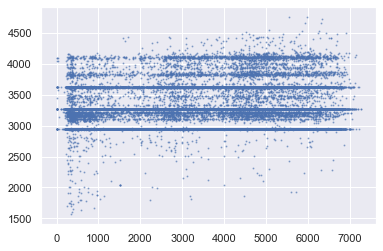

In [163]:
plt.scatter(y_train, Y_hat_train, alpha ='0.5', s = 1 )
plt.show()

38563 38563


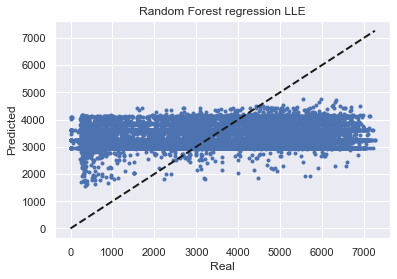

In [164]:
fig, ax = plt.subplots()
print(len(y_train),len(Y_hat_train))
ax.scatter(np.array(y_train), np.array(Y_hat_train), marker='.')
ax.plot([np.array(y_train).min(), np.array(y_train).max()], [np.array(y_train).min(), np.array(y_train).max()], 'k--', lw=2)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.title("Random Forest regression LLE")
plt.show()

### Cross-validation performance
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.

In [165]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.02 (+/- 0.01)


# Making a submission

## Unit testing

It is important that you test your submission files before submitting them. All you have to do to make a submission is modify the file model.py in the sample_code_submission/ directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

Keep the sample code simple.


In [166]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


Also test the scoring program:

In [167]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

'source' is not recognized as an internal or external command,
operable program or batch file.


# Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).

Do NOT zip the data with your submissions.

In [168]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + 'LLE.zip'
sample_result_submission = '../sample_result_submission_' + the_date + 'LLE.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_20-04-17-12-42LLE.zip
../sample_result_submission_20-04-17-12-42LLE.zip
